## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [1]:
import csv
import matplotlib.pyplot as plt

#Bubble Sort, sorteringsfunktion som används på uppgift 2. 
#Funktionen tar två argument, en lista som ska sorteras och ett index som representerar den kolumn som listan ska sorteras efter.
#Index ersätter funktionen av vad "lambda-funktion" vanligtvis hade åstadkommit om vi använt pythons"sorted()" där vi kan peka på vilken kolumn som ska sorteras.
def bubble_sort(list, index): 
    rows = len(list)

    #Funktionen består av en yttre loop som repeterar så många gånger det finns rader i en lista.
    for i in range(rows):
        for j in range(rows - 1): #Den inre loopen utför sorteringen. Vi har -1 för att inte hamna utanför listans gränser då vi alltid jämför med högra värdet.
            if list[j][index] < list[j + 1][index]: #Här jämför vi första iterationen rad 0, kolumn x mot rad 1, kolumn x
                #Rad 16-18 kallas för "Swap" inom bubble/selectionsort funktioner.
                #När villkoret på rad 13 är sant behöver vi temporärt spara över ett av värdena som ska byta plats för att förhindra att det skrivs över.
                temp = list[j]
                list[j] = list[j + 1]
                list[j + 1] = temp

    return list









## Deluppgift 1
Ev. kommentar:

- 1.a Skapa funktion som kan läsa in samtliga CSV-filer som uppgiterna baseras på. 
- 1.b Kontrollera funktionalitet genom att skapa listor av filerna och skriv ut tre första raderna 


In [2]:
#Uppgift 1a

def read_file(file_name):                               
    data_list = [] #Varje rad från CSV-filen kommer adderas till denna lista.                                      
    with open(file_name,"r", encoding = 'UTF-8-sig') as fil: #UTF-8 används för att säkerställa att all data läses in. 
        reader = csv.reader(fil, delimiter = ",") #Som framkommit i diskussionsforumet använder vi "," istället för ";" för att åtskilja kolumner        
        for rad in reader: #För att lägga till varje rad från CSV-filen, loopar vi igenom varje rad och lägger till den i den tomma listan vi skapade i början av funktionen.                              
            data_list.append(rad)        

    return data_list 
    #Genom att ange respektive CSV-fils namn som ska användas för uppgifterna kan vi nu enkelt få en python-lista där vi kan komma åt all data och arbeta med den.                                   


#Uppgift 1.b

WHR1Data = read_file("WHR2023.csv")
WHR2Data = read_file("WHR2020-2021.csv")
WHR3Data = read_file("WHR2005-2022.csv")

#För att kontrollera att funktionen ovan fungerar och datan har lästs in ordentligt går vi sekventiellt igenom de tre första raderna genom (:3) och skriva ut resultatet.
#/n används för att göra utskrifterna mer läsbara 

print("3 Rader från fil 1")
for rad in WHR1Data[:3]:
    print(rad)
print("\n")

print("3 Rader från fil 2")
for rad in WHR2Data[:3]:
    print(rad)
print("\n")

print("3 Rader från fil 3")
for rad in WHR3Data[:3]:
    print(rad)
print("\n")
            




3 Rader från fil 1
['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
['Finland', '7.804', '10.792', '0.969', '71.150', '0.961', '-0.019', '0.182']
['Denmark', '7.586', '10.962', '0.954', '71.250', '0.934', '0.134', '0.196']


3 Rader från fil 2
['country', 'region', 'subregion', 'pop2023', 'growthRate', 'area', 'landAreaKm', 'density', 'densityMi', 'Rank', 'happiness2021', 'happiness2020', 'scoreDifference', 'rank']
['Finland', 'Europe', 'Northern Europe', '5545475.00', '0.00085', '338424', '303940', '182453.00', '472553.00', '118', '7.842', '7.809', '0.033', '1']
['Denmark', 'Europe', 'Northern Europe', '5910913.00', '0.00487', '43094', '40000', '1477728.00', '3827316.00', '115', '7.62', '7.646', '-0.026', '2']


3 Rader från fil 3
['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make l

## Deluppgift 2
Ev. kommentar:

- 2a Baserat på användarens inmatning (1-7), plocka ut den specifika kolumnen och sortera den (egen sorteringsfunktion, se början av svarsfilen). 
- 2b Generera en tabell med den specifika kolumndatan. Tabellen ska visa top 8 och bot 8 länders kolumndata.
- 2c Generera ett stapeldiagram med samma format (top 8 och bot 8).

Välj en kolumn mellan 1-7:1
De 8 högsta värdena i kolumn 1 (Ladder score)
|Country name			Ladder score
|Finland                        |7.804                        |
+-------------------------------+-----------------------------+
|Denmark                        |7.586                        |
+-------------------------------+-----------------------------+
|Iceland                        |7.53                         |
+-------------------------------+-----------------------------+
|Israel                         |7.473                        |
+-------------------------------+-----------------------------+
|Netherlands                    |7.403                        |
+-------------------------------+-----------------------------+
|Sweden                         |7.395                        |
+-------------------------------+-----------------------------+
|Norway                         |7.315                        |
+-------------------------------+-----------------------------+
|

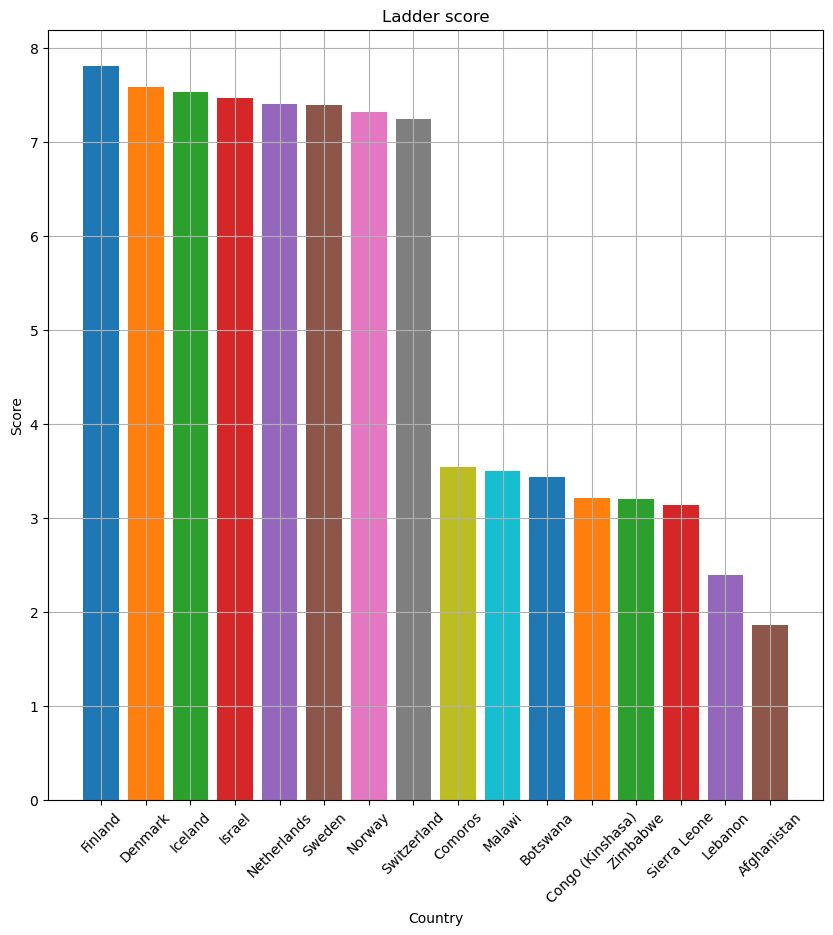

In [3]:
WHR1Data = read_file("WHR2023.csv")

def col_analysis(col):
    
#Uppgift 2a - Plocka ut specifik data
    
    analysis_data = [] #Tom lista som den specifika kolumndatan kommer sparas i för att sedan bearbetas. 
    
    for row in WHR1Data[1:]: #Börja loopen på radindex (1) för att undvika att spara ner kolumntitlar. 
        analysis_data.append([row[0],float(row[col])]) #Sparar ner landet på kolumn 0 och kolumnen vars index baseras på användarens inmatning. Observera konvertering till flytttal då samtlig data från CSV-filen lagras som strängar.
    
    #Här utnyttjar vi den egendefinerade funktionen vi skapade i början svarsfilen vilket tillåter oss att sortera listan men även välja vilken kolumn som ska sorteras.
    analysis_data = bubble_sort(analysis_data,1) 
    
#Uppgift 2b - Tabell
    
    print(f"De 8 högsta värdena i kolumn {col} ({WHR1Data[0][col]})") #Eftersom vi inte sparade ner kolumntiteln i listan ovan kan vi enkelt komma åt den genom orginallistan genom att peka mot första raden och kolumnindex som användaren angivit.
    print(f"|Country name\t\t\t{WHR1Data[0][col]}")
    for row in analysis_data[:8]: #När listan är sorterad kan vi genom (:8) skriva ut de första 8 raderna vilket kommer representera de högsta värderna.
        print(f"|{row[0]:<31}|{row[1]:<29}|") #Genom (<31) och (<29) kan vi positionera texten så den radar upp fint med tabellstrukturen. 
        print("+-------------------------------+-----------------------------+")
    print("+-------------------------------+-----------------------------+")
    print(f"De 8 lägsta värdena i kolumn {col} ({WHR1Data[0][col]})") #Repetera med lägsta värden.
    for row in analysis_data[-8:]: #Istället för första 8 värden pekar vi på (-8) vilket ger oss de sista 8. 
        print(f"|{row[0]:<31}|{row[1]:<29}|")
        print("+-------------------------------+-----------------------------+")
    
#Uppgift 2c - Stapeldiagram
    
    #För att skapa diagrammet kan vi extrahera ut top 8 och bot 8 data till två enskilda listor så vi enklare kan representera datan genom matplotlib.
    #Genom liknande metodik från tabellutskriften ovan loopar vi med samma teknik så vi får en lista med endast top 8 och bot 8 datan.
    x_labels = [item[0] for item in analysis_data[:8] + analysis_data[-8:]] #item[0] ger oss länderna på x-axeln
    y_labels = [item[1] for item in analysis_data[:8] + analysis_data[-8:]] #item[1] ger oss kolumndatan på y-axeln
    
    #16 färger som korrospondererar med det färgschema som visas i exemplet från uppgiftsbeskrivningen
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
                  "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
    
    plt.figure(figsize=(10,10))
    #Genom att skapa ovanstående tre variabler kan vi nu sätta ihop stapeldiagrammet. 
    plt.bar(x_labels,y_labels,color=colors)
    plt.title(WHR1Data[0][col])
    plt.xlabel("Country")
    plt.ylabel("Score")
    
    
    plt.grid() #Ger utseendet av ett rutnät som korrosponderar med exemplet i uppgiften.
    plt.xticks(rotation=45) #Ger en lutning på länderna så de blir mer synliga och inte överlappar varandra.
    
    plt.show()
    

inmatning = int(input("Välj en kolumn mellan 1-7:")) #Konverterar inmatningen från användaren som är en string till heltal så funktionen ovan ska kunna peka mot ett kolumnindex i WHR1Data
col_analysis(inmatning)


## Deluppgift 3
Ev. kommentar:
- 3a Ta ut beräknad data för varje kolumn. 
- 3b Generera tabell som skriver ut den beräknade datan för varje kolumn.
- 3c Generera stapeldiagram för top 8 & bot 8 data för varje kolumn (likt uppgift 2).

+----------------------------------+------------+--------+--------+-------+
|År 2023                                                                  |
+----------------------------------+------------+--------+--------+-------+
|Namn                              |medelvärde  | median |min     |max    |
+----------------------------------+------------+--------+--------+-------+
|Ladder score                      |5.54        |5.68    |1.86    |7.80   |
+----------------------------------+------------+--------+--------+-------+
|Logged GDP per capita             |9.45        |9.57    |5.53    |11.66  |
+----------------------------------+------------+--------+--------+-------+
|Social support                    |0.80        |0.83    |0.34    |0.98   |
+----------------------------------+------------+--------+--------+-------+
|Healthy life expectancy           |64.96       |65.83   |51.53   |77.28  |
+----------------------------------+------------+--------+--------+-------+
|Freedom to 

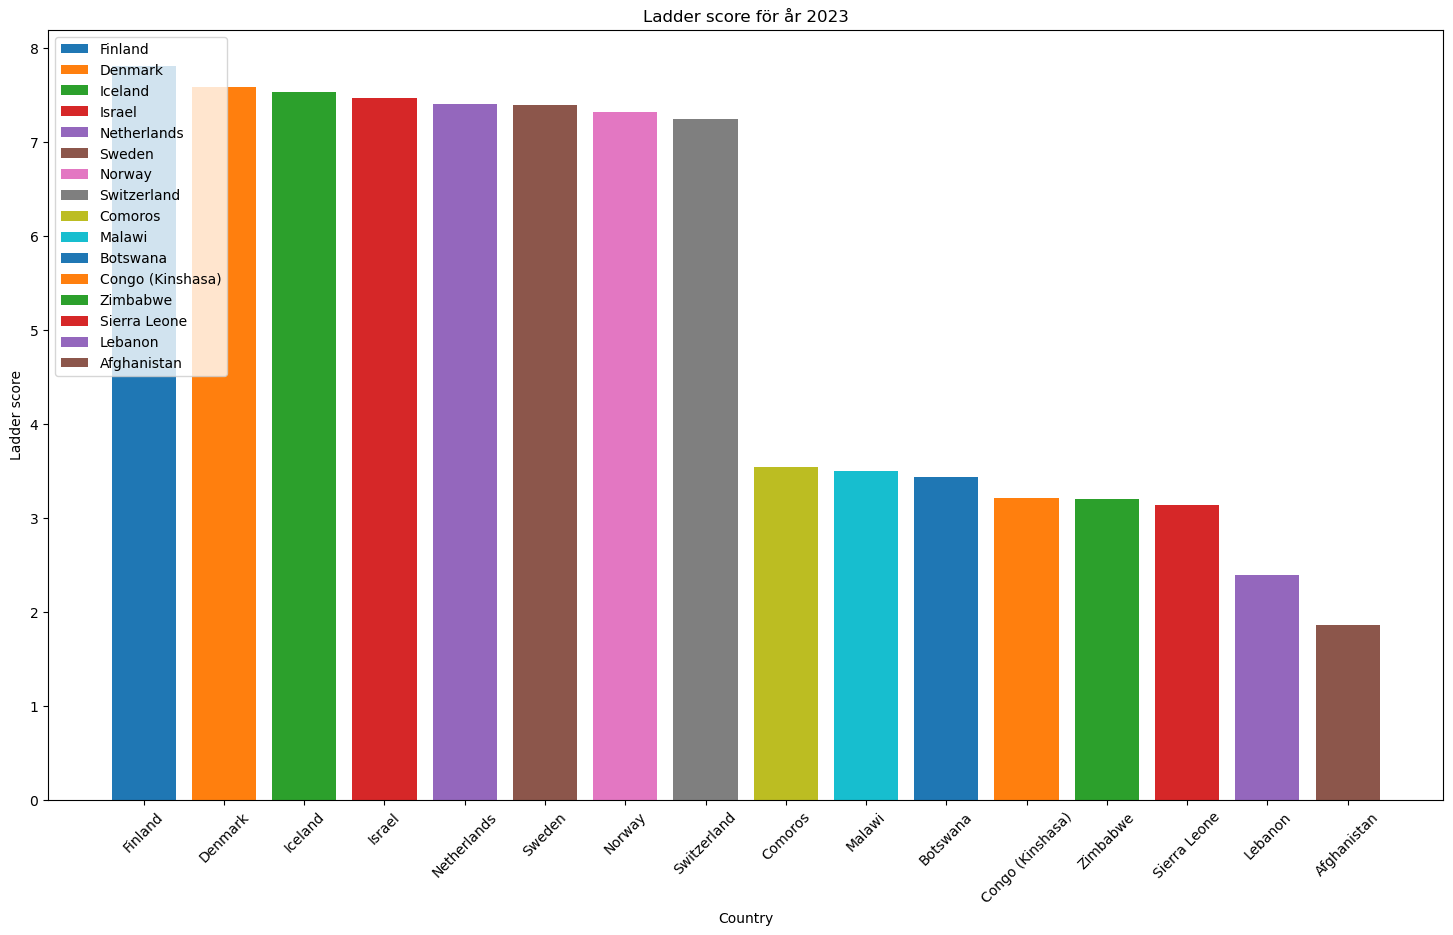

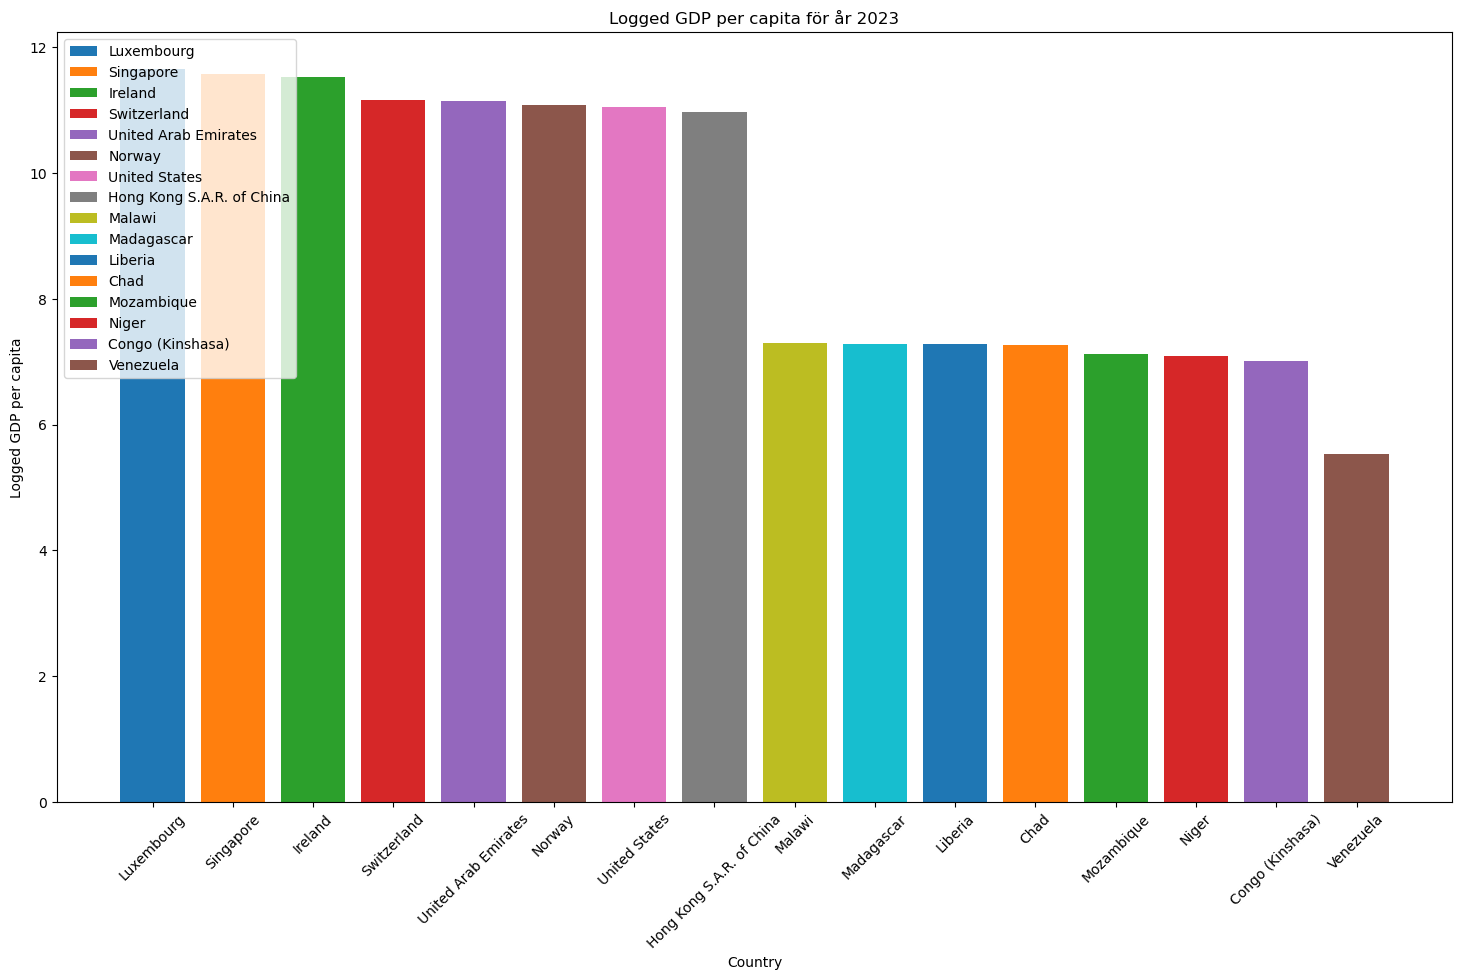

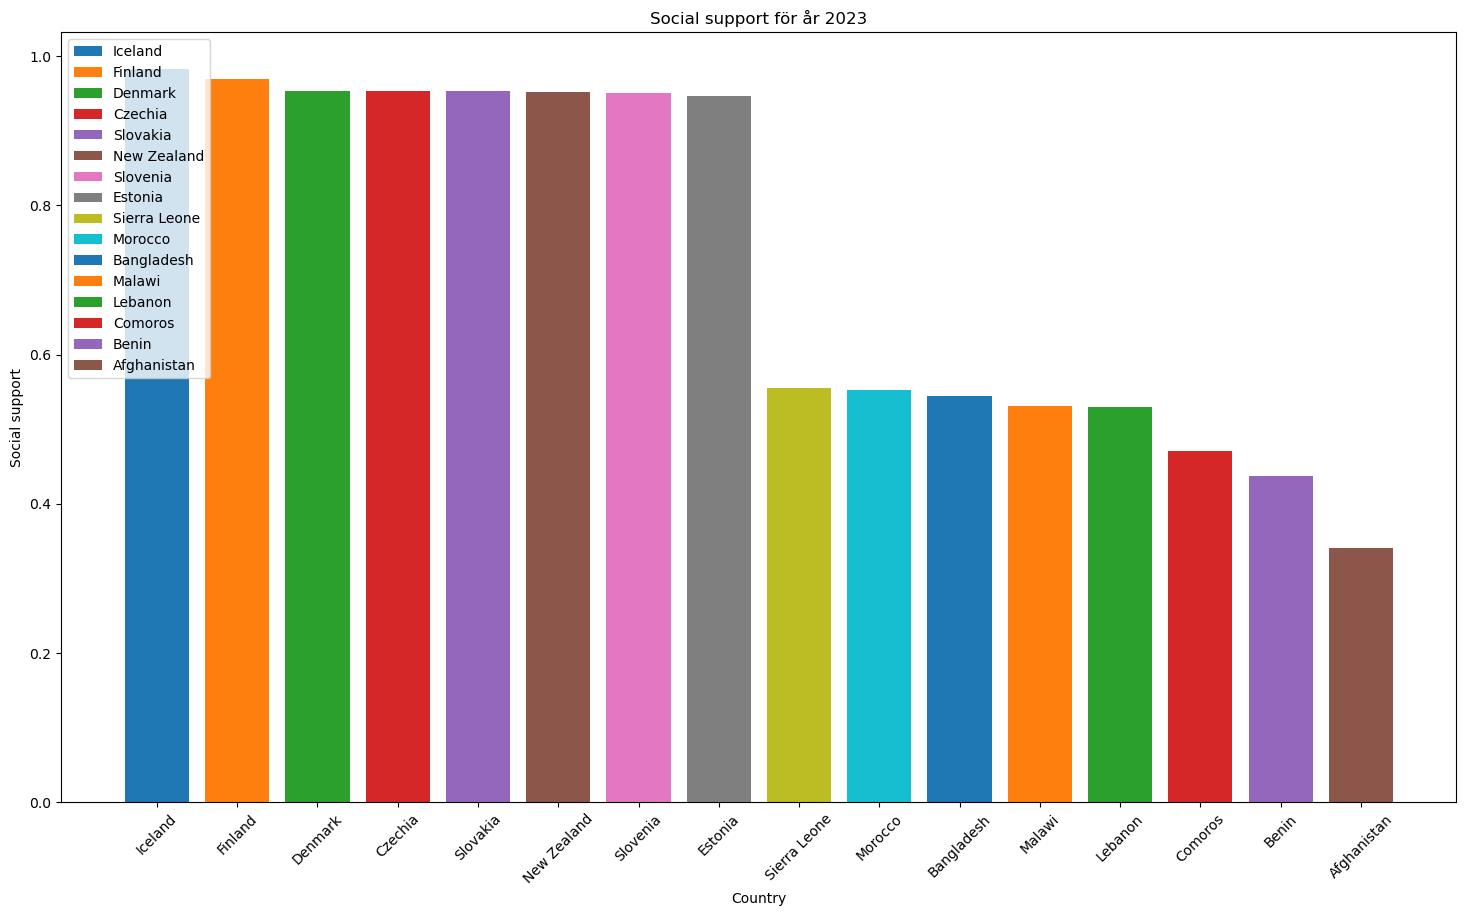

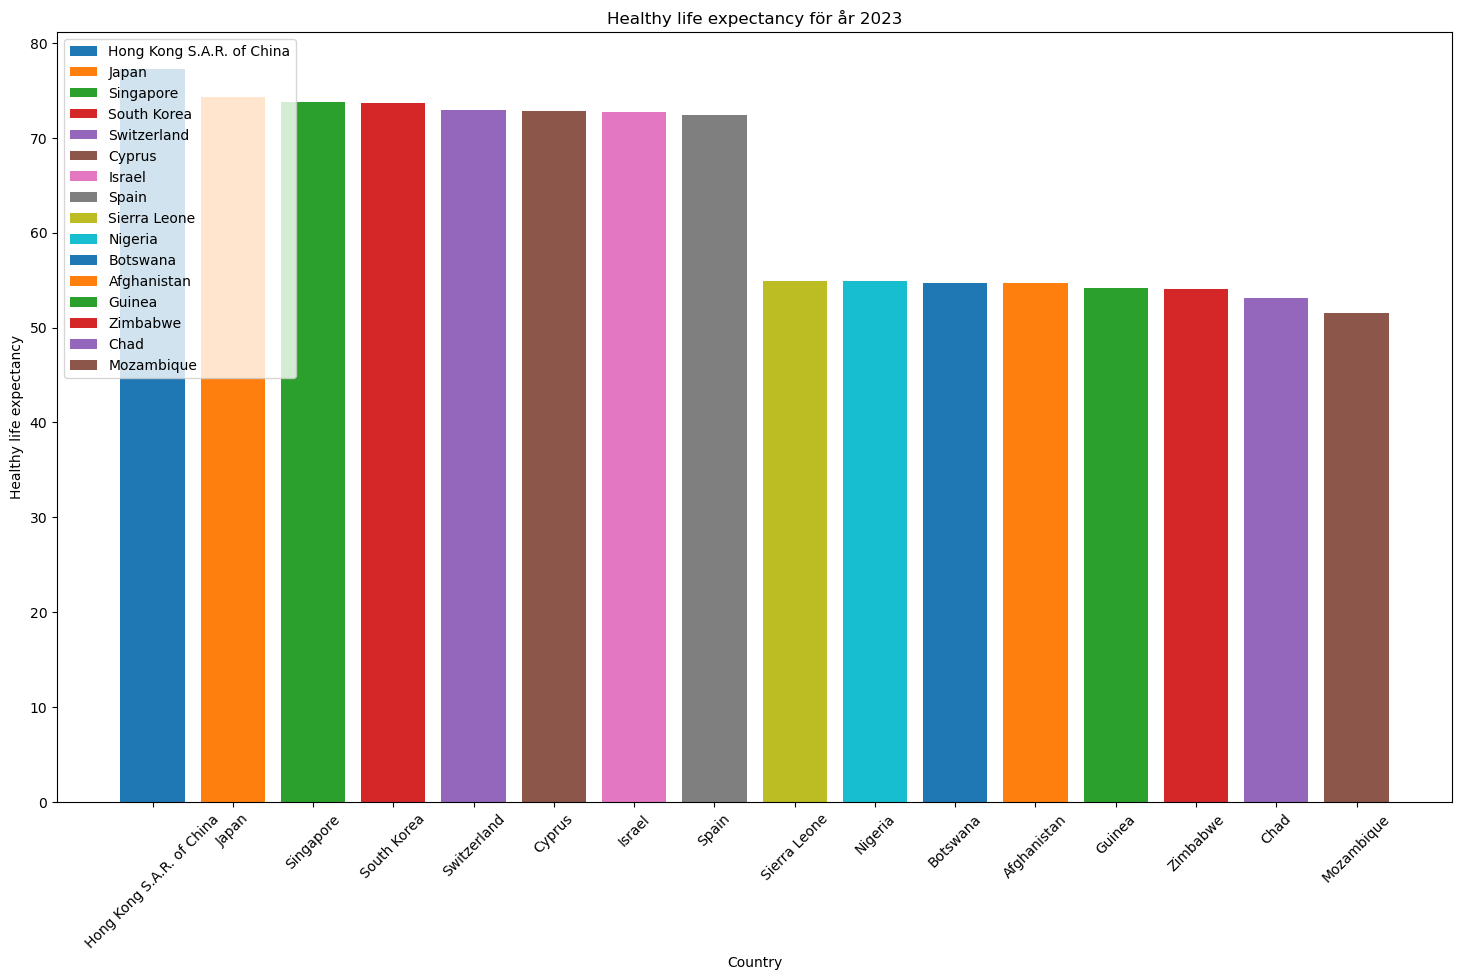

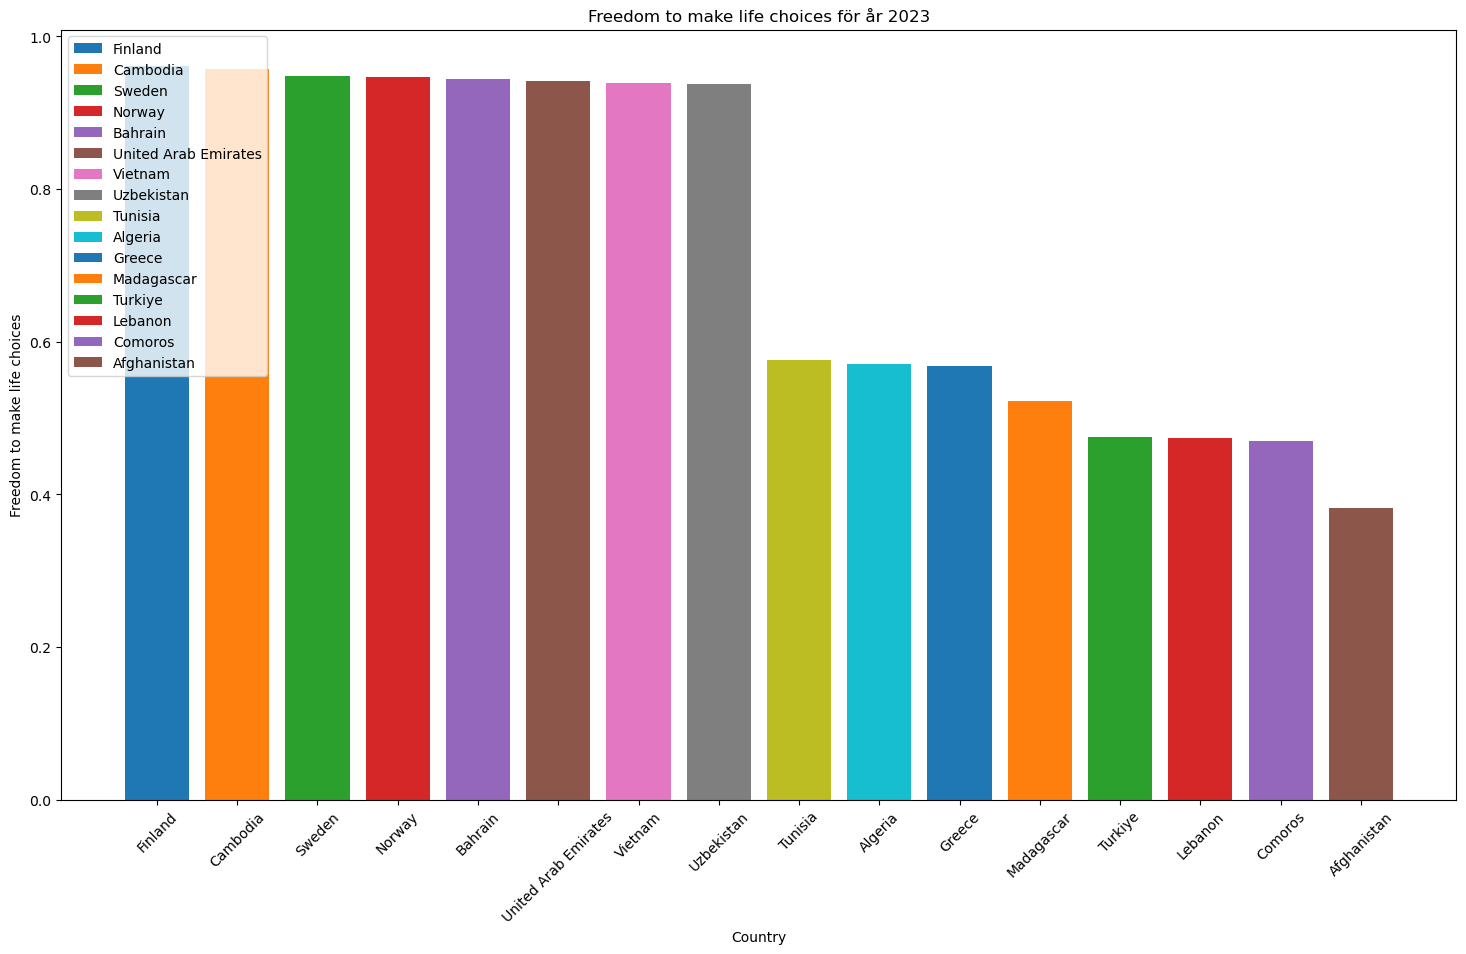

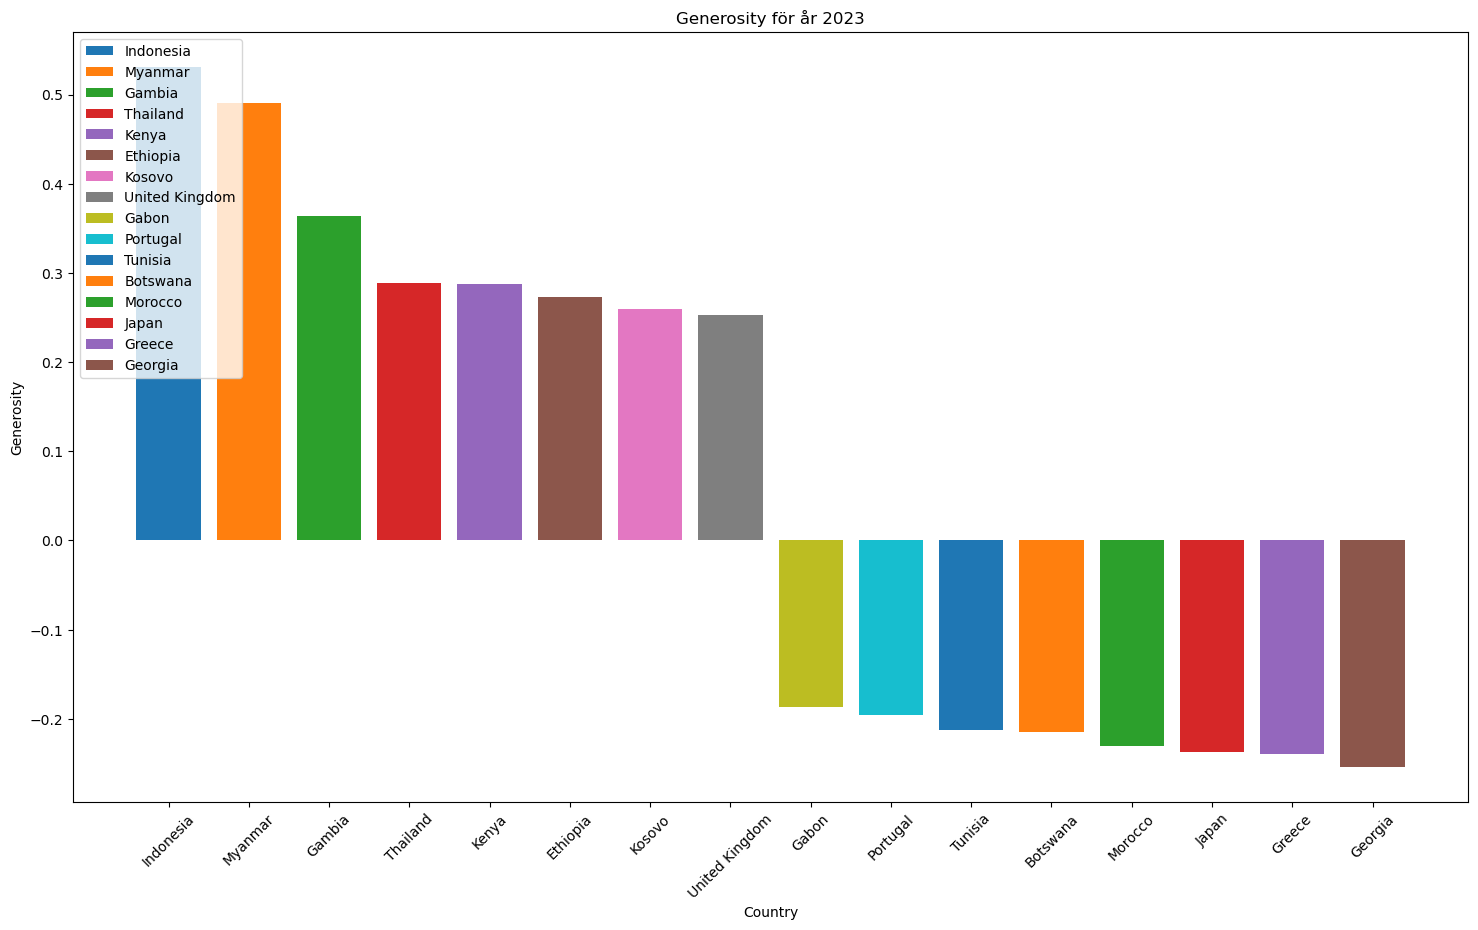

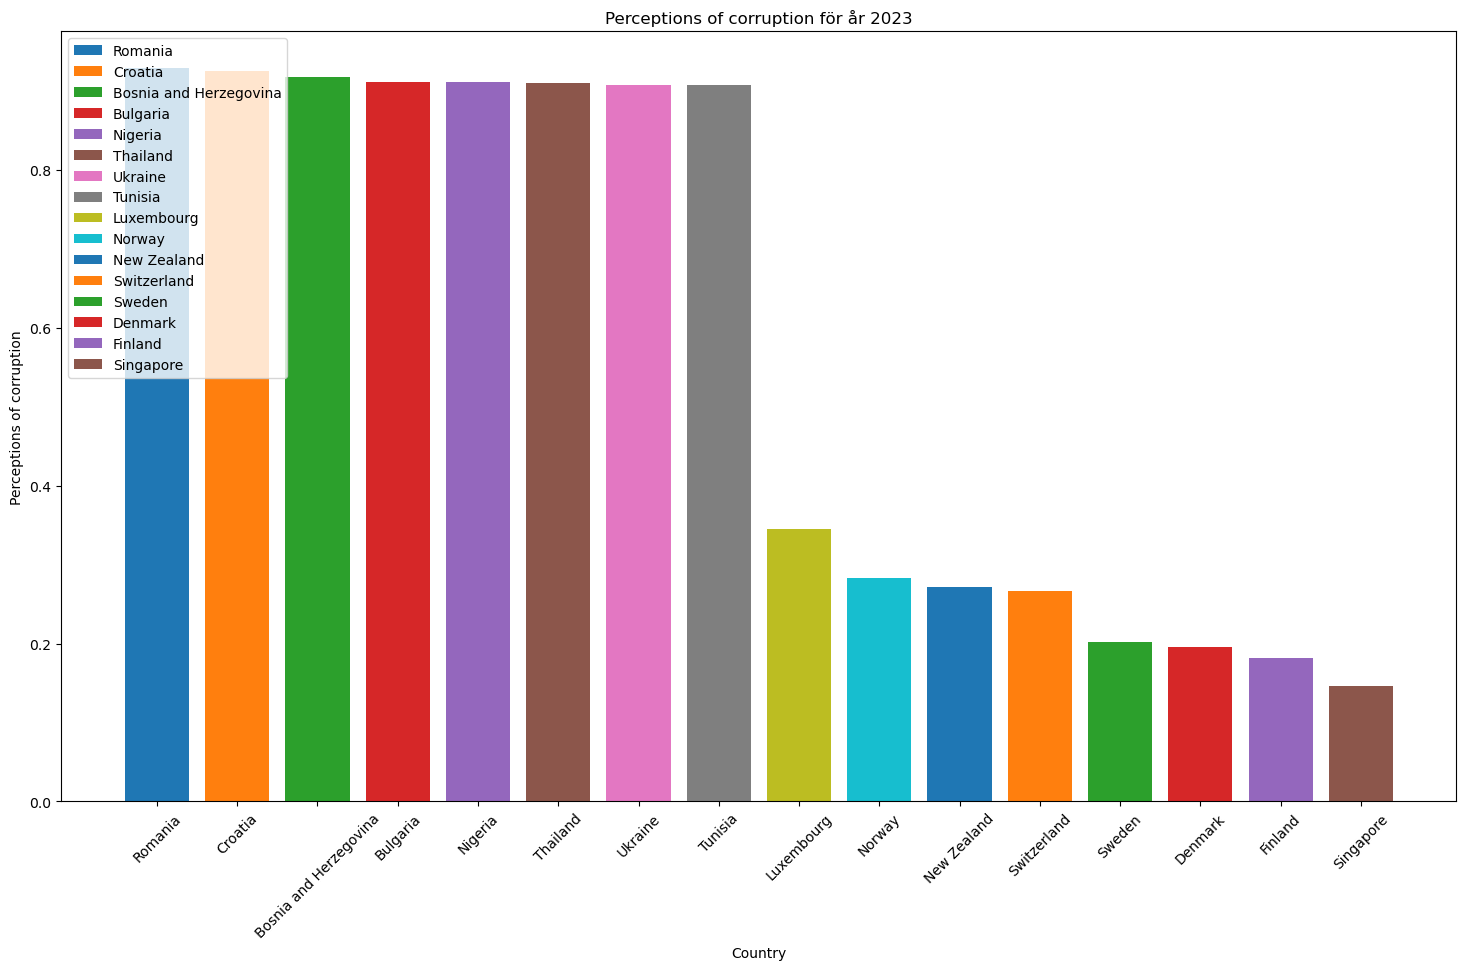

In [4]:
WHR1Data = read_file("WHR2023.csv")

def multiGraph_and_calc():

#Uppgift 3a 
    #Plocka ut specifik data
    calculated_col_data = [] #Slutgiltlig lista som ska lagra all beräknad kolumndata efter iterationerna nedan.  

    for i in range(1,len(WHR1Data[0])): #Yttre loop körs 7x - vi börjar från 1 eftersom kolumnindex 0 representerar länder.
        temp_data_list = [] #Temporär lista underlättar uträkning av median - se rad 33
        col_title = "" 
        sum_col_values = 0
        min_col_value = float('inf') #Eftersom det finns både positiva och negativa värden i kolumndatan använders 'inf' för att säkerställa att min och max värden beräknas korrekt.
        max_col_value = float('-inf')
        average_col_value = 0
        median_col_value = 0

        for row in WHR1Data[1:]: #Den inre loopen utför beräkningarna, denna loop repteras 7x så att vi kan beräkna och lagra all kolumndata
            current_col_value = float(row[i])
            temp_data_list.append(current_col_value)

            col_title = WHR1Data[0][i]
            
            #Beräkning av min, max, & average 
            if current_col_value < min_col_value: #Genom att jämföra samtliga kolumnvärden med varandra kan vi bestämma det största och minsta värdet för respektive kolumn.
                min_col_value = current_col_value

            if current_col_value > max_col_value:
                max_col_value = current_col_value

            sum_col_values += current_col_value #För att ge förutsättningar för beräkning av genomsnittet av en kolumn skapade vi en tom variabel på rad 10 som adderar varje kolumnsvärde under iterationen.

            average_col_value = sum_col_values / len(WHR1Data[1:]) #Nu kan vi ta summan av en kolumn och dela med antal rader. Observera att CSV-filen har 138 rader och att vi börjar från 137 för att exkludera kolumntitlar.

            # Ta fram median
            temp_data_list = sorted(temp_data_list) #Förutsättningarna för att beräkna medianen är att datan är sorterad.
            length = len(temp_data_list) 

            mid = length // 2 #För att ta reda på mittenindex i listan tar vi antal rader och delar (obs heltalsdivision //) med två. 
            if length % 2 == 0: #Till följd av heltalsdivision med avrundning neråt (68.5 -> 68) blir restvärdet 1 och därmed är villkoret falskt.
                median_col_value = (temp_data_list[mid-1] + temp_data_list[mid]) // 2
            else:
                median_col_value = temp_data_list[mid] #Därmed tilldelas medianen värdet i listan på index[68]
   
        #När den inre loopen har körts klart med alla beräkningar, läggs de bräknade värdena till för en enskild kolumn i den slutgiltliga listan som skapades i början. 
        calculated_col_data.append([col_title,average_col_value,median_col_value,min_col_value,max_col_value])
    
#Uppgift 3b 
    #Tabell
    #Samma metodik från uppgift 2b används för utskrift av data
    print("+----------------------------------+------------+--------+--------+-------+")
    print("|År 2023                                                                  |")
    print("+----------------------------------+------------+--------+--------+-------+")
    print("|Namn                              |medelvärde  | median |min     |max    |")
    print("+----------------------------------+------------+--------+--------+-------+")

    for row in calculated_col_data:
        print(f"|{row[0]:<34}|{row[1]:<12.2f}|{row[2]:<8.2f}|{row[3]:<8.2f}|{row[4]:<7.2f}|") #Det som skiljer sig från tidigare är användningen av decimalbegränsning, ".2f" bidrar till att endast skriva ut två decimaler.
        print("+----------------------------------+------------+--------+--------+-------+")
        

#Uppgift 3c
    #Stapeldiagram (7st.) 
    #Eftersom vi ska producera 7 diagram behöver vi repetera koden nedan 7x. Vi använder "i" från den yttre loopen för att peka mot specifika kolumner.
    for i in range(1,len(WHR1Data[0])):
        data_to_plot = [] #Temporär lagringsplats som vi sedan använder för att extrahera ut y-& xaxeln. Listan lagrar kolumnnamnet och värdet
        
        for row in WHR1Data[1:]:
            data_to_plot.append([row[0],float(row[i])]) #Sparar ner namn på kolumn + värdet. 

        data_to_plot = sorted(data_to_plot,key=lambda x: x[1], reverse=True) #Sorterar på index 1 (värdet) så vi kan extreahera top 8 och bot 8 värden nedan. 
        
        #Samma metodik som i uppgift 2c för att effektivt plocka ut rätt data som ska plottas.
        x_axis = [item[0] for item in data_to_plot[:8] + data_to_plot[-8:]]
        y_axis = [item[1] for item in data_to_plot[:8] + data_to_plot[-8:]]


        
        colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
                  "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
        
        #Jämfört med uppgift 2 lägger vi även till ettiketter (legend) vilket tilldelas alla länders namn (x-axeln)
        plt.figure(figsize=(18,10))
        for j in range(0,len(x_axis)):
            plt.bar(x_axis[j], y_axis[j],label = x_axis[j])
        
        
        plt.legend(loc="upper left")
        
        plt.xlabel("Country")
        
        #Ylabel och titel blir dynamiska med hjälp av yttre loopens "i" variabel där vi kan peka mot ursprungslistans första rad och sedan kolumnindex genom i vilket ger titeln på kolumnen
        plt.ylabel(f"{WHR1Data[0][i]}")
        plt.title(f"{WHR1Data[0][i]} för år 2023")
        plt.xticks(rotation=45)
        
        
        
        plt.show()
        
        
        
    
multiGraph_and_calc()


## Deluppgift 4
Ev. kommentar:

- 4a Ta ut regionenspecifik data och enskilda kolumner (land, hindex21,hindex20, rank).
     4b: Beräkna medelvärde.OBS att jag räknar medelvärdet på båda åren.
- 4b Generera tabell med regionens data för kolumenerna. 
- 4c Generera ett diagram (1 scatter med rank, två stapeldiagram som står i varandra med olika bredd).

Anmärk att utskriften av graferna avviker lite jämfört med uppigftsbeskrivningen i form av cirklarnas färg. Uppgiftsbeskrivningen illustrerar rank med två färger i cirklarna medans jag endast använder en färg. Detta har diskuterats i diskussionsforumet den 3 juli där informationen att detta tillvägagångssätt ska vara ok också. 
Detta medför till att 2 stapeldiagram för respektive top och bot data för illustreras. Detta har också diskuterats i diskussiosnforumet

Ange region: Asia
---------------------------------------------
Medelvärde 5.32 över happiness index för länder i Asia år 2021 och 2020

Länder i Asia:

|Land                      |Score för 2021 |Score för 2020  |Rank |
+--------------------------+---------------+----------------+-----+
|Israel                    |7.16           |7.13            |12   |
+--------------------------+---------------+----------------+-----+
|Bahrain                   |6.65           |6.23            |22   |
+--------------------------+---------------+----------------+-----+
|Taiwan                    |6.58           |6.46            |24   |
+--------------------------+---------------+----------------+-----+
|United Arab Emirates      |6.56           |6.79            |25   |
+--------------------------+---------------+----------------+-----+
|Saudi Arabia              |6.49           |6.41            |26   |
+--------------------------+---------------+----------------+-----+
|Singapore                 |6.3

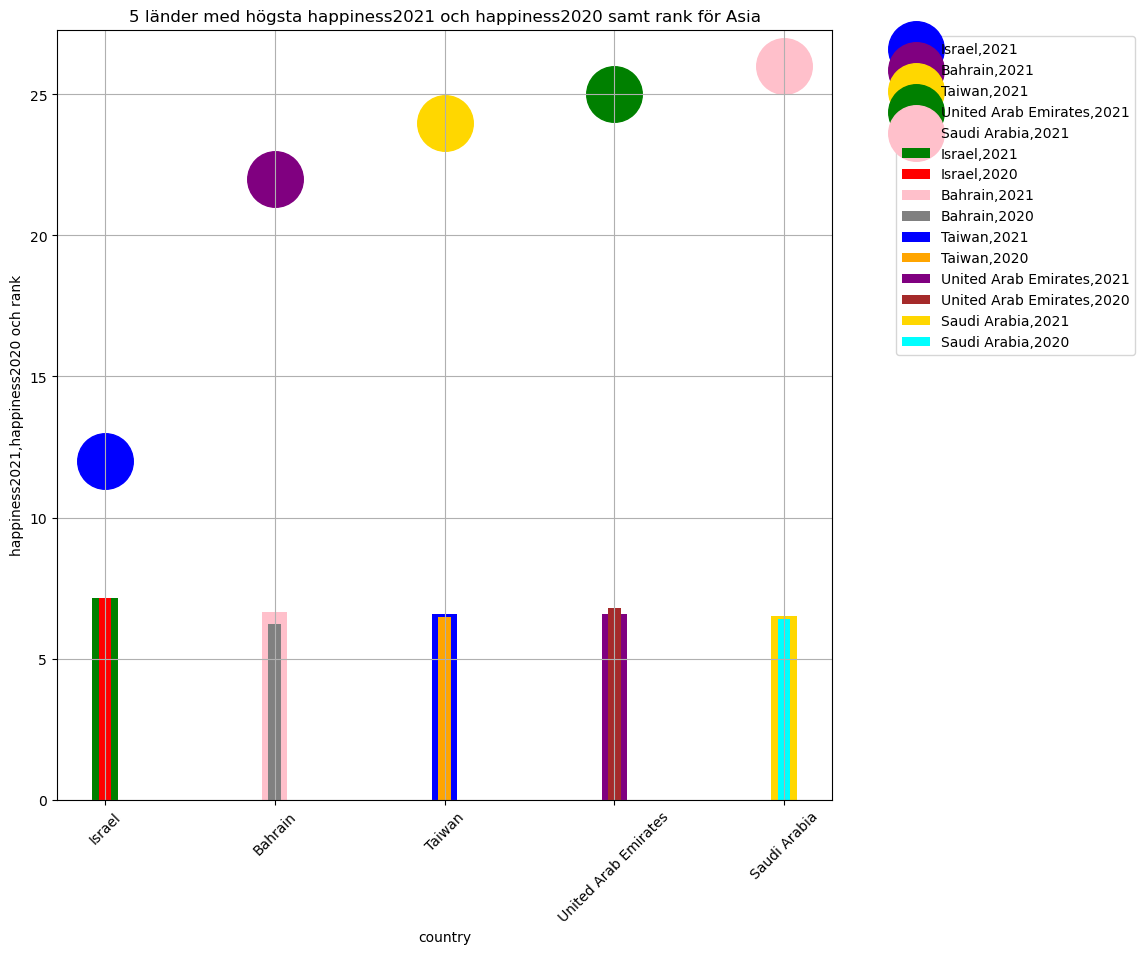

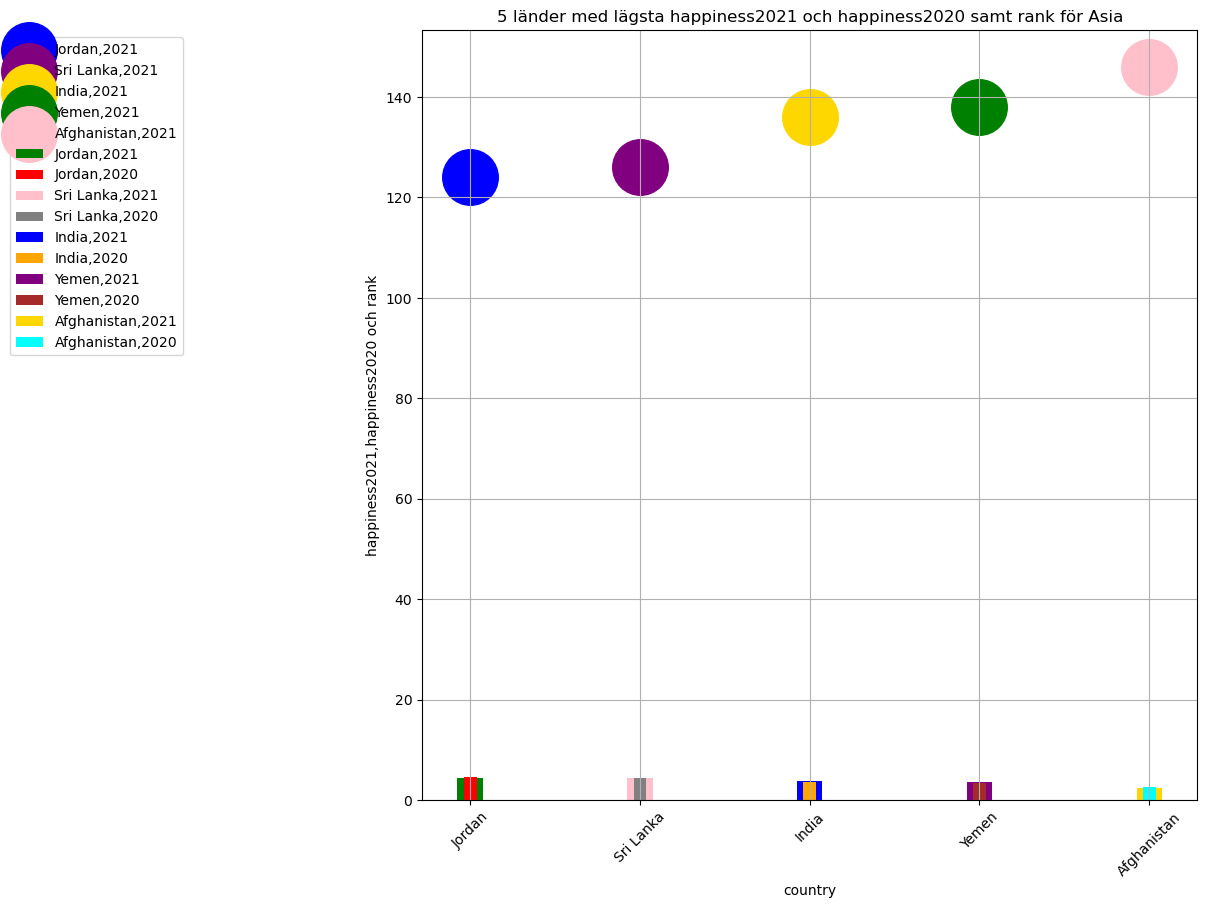

In [5]:
WHR2Data = read_file("WHR2020-2021.csv")

def happy_region_analysis(region):
    
#Uppgift 4a 
    
    #Plocka ut specifik data
    
    region_data = []
    
    #Liknande metodik som tidigare uppgifter. Observera olika konverteringar (land: sträng, h-index: flytttal, år: heltal)
    for row in WHR2Data:
        if region in row[1]:
            region_data.append([row[0], float(row[10]), float(row[11]), int(row[13])])
    
    #Regionsdatan sorteras efter happinessindex 2021, lambda-funktionen går in i kolumn 1 i den nya listan och sorterar fallande därefter. 
    #BubbleSort funktionen som skapades i början av svarsfilen hade fungerat bra här också men vill även demonstrera ett annat alternativ.
    region_data = sorted(region_data,key=lambda x: x[1], reverse=True)
    
    #Beräkna medelvärdet av regionens happinessindex för år 2021 & 2020 (Ok att beräkan båda åren enligt diskussionsforumet)
    sum_of_happy = 0
    
    for row in region_data:
        sum_of_happy  += row[1]+row[2] #Adderar summan av 2021 och 2020 happinessindex

    average_happy = sum_of_happy  / (len(region_data)*2) # * 2 eftersom vi har två kolumner som summerats. 
    
#Uppgift 4b

    #Samma metodik för tabellutskrift används som beskrivs i uppgift 2b
    print("---------------------------------------------")
    print(f"Medelvärde {average_happy:.2f} över happiness index för länder i {region} år 2021 och 2020\n")
    print(f"Länder i {region}:\n")
    
    print("|Land                      |Score för 2021 |Score för 2020  |Rank |")
    print("+--------------------------+---------------+----------------+-----+")
    
    for row in region_data: 
        print(f"|{row[0]:<26}|{row[1]:<15.2f}|{row[2]:<16.2f}|{row[3]:<5}|")
        print("+--------------------------+---------------+----------------+-----+")
    
    
#Uppgift 4c 

    #Diagram 1 - Top data
    
    top_5_data = region_data[:5]
    
    #Tre kolumner ska representeras. Listor som korrosponderar med kolumner tilldelas de färger som visas i uppgiftsbeskrivningen
    colors_rank = ["Blue","Purple","Gold","Green","Pink"]
    colors_y21 = ["Green","Pink","Blue","Purple","Gold"]
    colors_y20 = ["Red","Gray","Orange","Brown","Cyan"]
    
    plt.figure(figsize=(10,10))
    #För att underlätta att visa varje datapunkts land och år som etikett(legend) upprepar vi koden nedan 5ggr.
    #Genom "i" variabeln kan vi effektivt peka mot varje rad i top-datan. Detta medför till att vi skapar 15 ettiketter med korrosponderande färger till diagrammets datapunkter.
    for i in range(len(top_5_data)):
        plt.scatter(top_5_data[i][0], top_5_data[i][3],color = colors_rank[i], s=1600, label=f"{top_5_data[i][0]},2021")
        plt.bar(top_5_data[i][0], top_5_data[i][1], color = colors_y21[i], width=0.15, label=f"{top_5_data[i][0]},2021")
        plt.bar(top_5_data[i][0], top_5_data[i][2], color = colors_y20[i], width=0.075, label=f"{top_5_data[i][0]},2020")

    
    #För att undvika mängden hårdkodning av diagrammets beskrivningar pekar vi mot ursprungslistans kolumntitlar. 
    plt.title(f"5 länder med högsta {WHR2Data[0][10]} och {WHR2Data[0][11]} samt {WHR2Data[0][13]} för {region}")
    plt.xlabel(f"{WHR2Data[0][0]}")
    plt.ylabel(f"{WHR2Data[0][10]},{WHR2Data[0][11]} och {WHR2Data[0][13]}")
    
    plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    
    
    #Diagram 2 - REPETITION AV KODEN OVAN FAST MED BOTTEN-DATAN
    bot_5_data = region_data[-5:]
    
    plt.figure(figsize=(10,10))
    for i in range(len(bot_5_data)):
        plt.scatter(bot_5_data[i][0], bot_5_data[i][3],color = colors_rank[i], s=1600, label=f"{bot_5_data[i][0]},2021")
        plt.bar(bot_5_data[i][0], bot_5_data[i][1], color = colors_y21[i], width=0.15, label=f"{bot_5_data[i][0]},2021")
        plt.bar(bot_5_data[i][0], bot_5_data[i][2], color = colors_y20[i], width=0.075, label=f"{bot_5_data[i][0]},2020")

    
    plt.title(f"5 länder med lägsta {WHR2Data[0][10]} och {WHR2Data[0][11]} samt {WHR2Data[0][13]} för {region}")
    plt.xlabel(f"{WHR2Data[0][0]}")
    plt.ylabel(f"{WHR2Data[0][10]},{WHR2Data[0][11]} och {WHR2Data[0][13]}")
    
    plt.legend(loc="upper right", bbox_to_anchor=(-0.3, 1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    

inmatning = input("Ange region: ")
happy_region_analysis(inmatning)
            
         
    



## Deluppgift 5
Ev. kommentar:
- 5a Plocka ut ett lands specifika kolumndata (land, år, life_ladder, tom plats för förändringsfaktor)
- 5b Beräkna medelvärdet för landets life ladder och skriv ut 
- 5c Skapa ett linjediagram med landets life ladder över åren som landet har data för life ladder 
- 5d Beräkna förändringsfaktorn av life ladder mellan åren. 
   d+ Generera en tabell av med: år, life ladder och förändringsfaktorn
- 5e Generera ett stapeldiagram där yaxeln visar förändringsfaktorn och xaxeln visar åren.

För att göra grafen lite synligare har jag flyttat ut ettiketten vänster om grafen. Enligt diskussionsforumet det 5 juli gavs följande svar "Det är ok att flytta etiketter med hjälp av  bbox to anchor."


Ange landet som ska presenteras: Sweden
Medelvärde av Life Ladder är 7.4 för Sweden


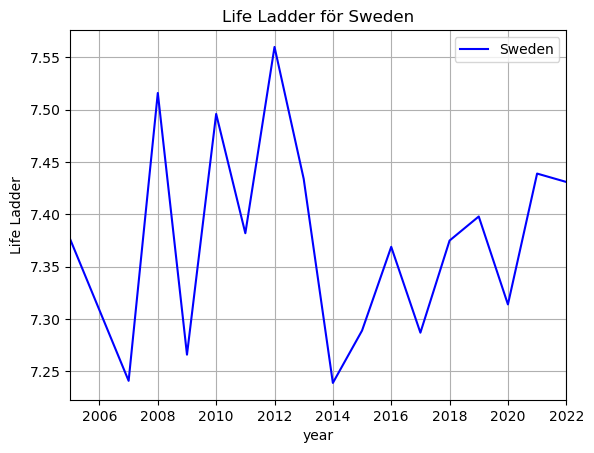

|År     |score för Sweden|Förändringsfaktor
+-------+----------------+-----------------+
|2005   |7.376           | -1.83           |
+-------+----------------+-----------------+
|2007   |7.241           |  3.80           |
+-------+----------------+-----------------+
|2008   |7.516           | -3.33           |
+-------+----------------+-----------------+
|2009   |7.266           |  3.17           |
+-------+----------------+-----------------+
|2010   |7.496           | -1.52           |
+-------+----------------+-----------------+
|2011   |7.382           |  2.41           |
+-------+----------------+-----------------+
|2012   |7.56            | -1.67           |
+-------+----------------+-----------------+
|2013   |7.434           | -2.62           |
+-------+----------------+-----------------+
|2014   |7.239           |  0.69           |
+-------+----------------+-----------------+
|2015   |7.289           |  1.10           |
+-------+----------------+-----------------+
|2016   |7.

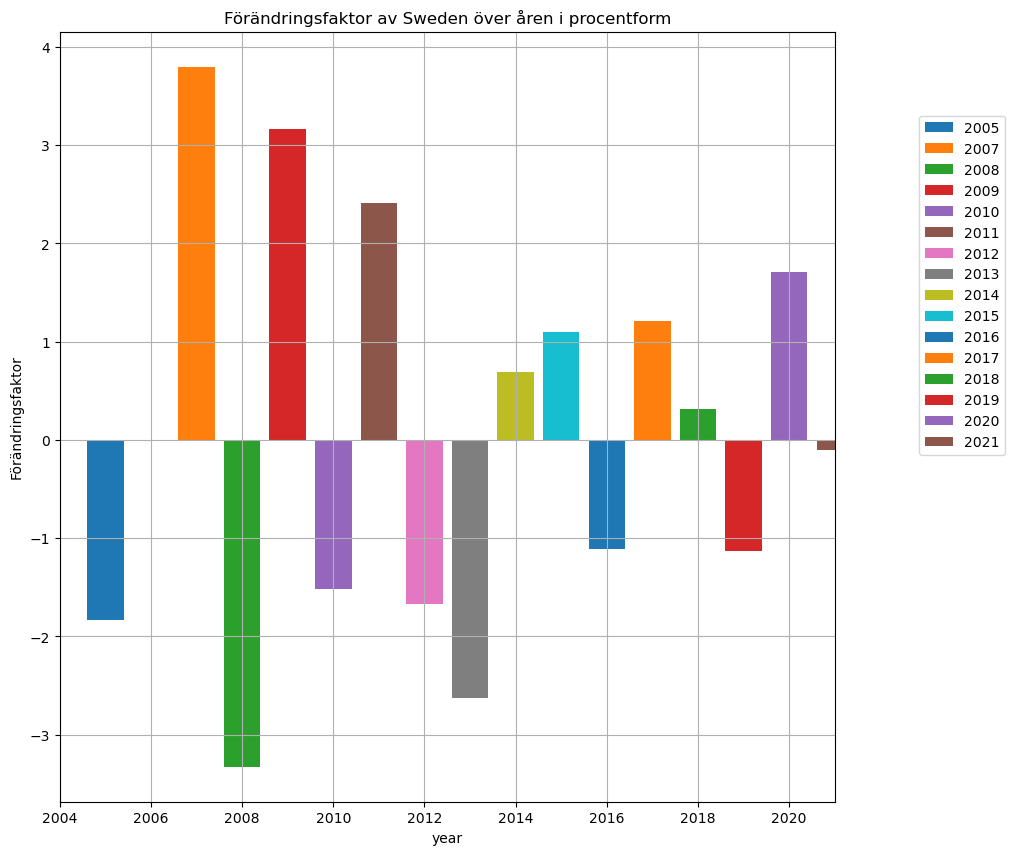

In [6]:
WHR3Data = read_file("WHR2005-2022.csv")

def life_ladder_analysis(country):
    
#Uppgift 5a
    #Ta ut specifik kolumndata
    country_life_ladder = []
    sum_of_life_ladder = 0
    
    for row in WHR3Data:
        if country in row[0]:
            change_factor = 0
            country_life_ladder.append([row[0],int(row[1]),float(row[2]),float(change_factor)]) #Eftersom all data i CSV-filen är strängar, konverterar vi som tidigare beskrivet till respektive ändamål vi behöver.
            sum_of_life_ladder += float(row[2])

#Uppgift 5b
    #Genomsnitssberäkning
    average_life_ladder = sum_of_life_ladder / len(country_life_ladder)
    print(f"Medelvärde av {WHR3Data[0][2]} är {average_life_ladder:.1f} för {country}") #Observera .1f på medelvärdet eftersom uppgiftsbeskrivningen endast visar en decimal. 
    
#Uppgift 5c     
    #Linjediagram
    
    #Samma metodik som beskrivits för tidigare uppgifter för att extrahera x och y axeln.
    x_axis = [item[1] for item in country_life_ladder]
    y_axis = [item[2] for item in country_life_ladder]
    
    plt.plot(x_axis, y_axis,  color="Blue",label= country)
    
    plt.title(f"{WHR3Data[0][2]} för {country}")
    plt.xlabel(WHR3Data[0][1])
    plt.ylabel(WHR3Data[0][2])
    
    
    plt.grid()
    plt.legend(loc="upper right")
    plt.xlim(x_axis[0],x_axis[-1]) #xlim används för att ta bort tom yta i grafen från det att x axeln börjar och slutar. (0 respektive -1 index representerar första och sista året, ex. 2005-2022)
    
    plt.show()
    
#Uppgift 5d
    #Beräkna förändringsfaktorn - obs "-1" i for loopen då vi inte inkluderar 2022 och vi undviker index out of range error.
    for i in range(len(country_life_ladder)-1):
        current_life = country_life_ladder[i+1][2]
        previous_life = country_life_ladder[i][2]
        change_factor = ((current_life - previous_life) / previous_life) * 100
        country_life_ladder[i][3] = change_factor
    
    #Samma metodik för tabellutskrift används som beskrivs i uppgift 2b
    print(f"|År     |score för {country}|Förändringsfaktor")
    print("+-------+----------------+-----------------+")
    
    for row in country_life_ladder[:-1]:
        print(f"|{row[1]:<7}|{row[2]:<16}|{row[3]:6.2f}           |")
        print("+-------+----------------+-----------------+")
    
#Uppgift 5e
    #Stapeldiagram
    # -1 används vid extrahering av x&y-axeln då sista året i listan ej har en beräknad förändringsfaktor
    x_axis = [item[1] for item in country_life_ladder[:-1]]
    y_axis = [item[3] for item in country_life_ladder[:-1]] 
    
    #Lista av färger som används vid plottning på rad 64. Färgerna ska korrospondera med exemplet i uppgiftsbeskrivningen. 
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray",
                  "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
    
    plt.figure(figsize=(10,10))
    for j in range(0,len(x_axis)):
        plt.bar(x_axis[j], y_axis[j],label = x_axis[j])
    
    
    plt.title(f"Förändringsfaktor av {country} över åren i procentform")
    plt.xlabel(WHR3Data[0][1])
    plt.ylabel("Förändringsfaktor")
    
    plt.xlim(x_axis[0]-1,x_axis[-1]) #Samma metodik som linjediagrammet -> (!) av någon anledning som jag inte kan lista ut behöver jag lägga till (-1) för att den ska justera till första värdet i x-axeln.
    plt.grid()
    #Rad 76 för att positionera ettiketterna är det jag beskriver i uppgiftskommentaren. Detta avviker från uppgiftsbeskrivningen men blir lite mer etetiskt. 
    plt.legend(loc="upper left",bbox_to_anchor=(1.1, 0.9))
    
    plt.show()
    

inmatning = input("Ange landet som ska presenteras: ")
life_ladder_analysis(inmatning)
